# Data Preparation

In [4]:
import pandas as pd
train_x_df = pd.read_csv('data/train_x_df.csv')
train_y_df = pd.read_csv('data/train_y_df.csv')
test_x_df = pd.read_csv('data/test_x_df.csv')
train_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.983614,0.983614,0.983128,0.983246,0.001334,10.650987,0.009855,0.000848,6.771755
1,0,1,9,0.983245,0.983612,0.982453,0.982693,0.001425,11.375689,0.016137,0.000697,5.565188
2,0,2,9,0.982694,0.983612,0.982403,0.983002,0.001542,12.301942,0.014166,0.000905,7.225459
3,0,3,9,0.983009,0.984848,0.983009,0.984486,0.002520,20.134695,0.021557,0.001171,9.353000
4,0,4,9,0.984233,0.984606,0.983612,0.984164,0.002818,22.515448,0.021434,0.001799,14.372534


In [17]:
train_y_df.columns[2:]

Index(['coin_index', 'open', 'high', 'low', 'close', 'volume', 'quote_av',
       'trades', 'tb_base_av', 'tb_quote_av'],
      dtype='object')

In [91]:
import numpy as np
def df2d_to_array3d(df_2d):
    feature_size = len(df_2d.columns[2:]) # 10
    time_size = len(df_2d.time.unique()) # x는 1380, y는 120
    sample_size = len(df_2d.sample_id.unique()) # train은 7661, test는 535
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d

train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)
test_x_array = df2d_to_array3d(test_x_df)

print(f'''
These shape stands for (sample_size, time_step, feature)
train_x_array {train_x_array.shape}
train_y_array {train_y_array.shape}
test_x_array {test_x_array.shape}
''')


These shape stands for (sample_size, time_series, feature)
train_x_array (7661, 1380, 10)
train_y_array (7661, 120, 10)
test_x_array (535, 1380, 10)



# 0번 샘플로만

In [54]:
df_0 = train_x_array[0]
# y = train_y_array
print('(timesteps, features)')
print(df_0.shape)

(timesteps, features)
(1380, 10)


In [184]:
X = list()
y = list()
for i in range(df_0.shape[0]):
    X.append(df_0[i: i + 200, 4])
    y.append(df_0[i+200: i + 320, 4]) # 4 for close
    if i + 320 == df_0.shape[0]:
        break
X = np.array(X)
y = np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)
y = y.reshape(y.shape[0], 1, y.shape[1])
X.shape, y.shape

((1061, 200, 1), (1061, 1, 120))

## 너로 정했다 케라스

케라케라~

In [151]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.keras import backend as K
from keras.losses import mean_squared_error

In [186]:
def rmse(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(200, 1)))
model.add(LSTM(128, activation='relu'))
model.add(Dense(120))
model.compile(optimizer='adam', loss=rmse)
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 200, 128)          66560     
_________________________________________________________________
lstm_39 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_20 (Dense)             (None, 120)               15480     
Total params: 213,624
Trainable params: 213,624
Non-trainable params: 0
_________________________________________________________________


In [185]:
y[0]

array([[0.98804015, 0.98743898, 0.98803401, 0.98791325, 0.98794037,
        0.98792195, 0.98755848, 0.98780489, 0.98859942, 0.98895538,
        0.98915869, 0.99162358, 0.98965508, 0.99062574, 0.98977703,
        0.99002337, 0.99002832, 0.99014658, 0.98945928, 0.98915744,
        0.98916602, 0.99014539, 0.99020201, 0.99062574, 0.99063808,
        0.99064666, 0.98940623, 0.98978192, 0.99071813, 0.99125403,
        0.99088448, 0.99088448, 0.9907366 , 0.98747718, 0.98842078,
        0.9890306 , 0.98979062, 0.98817444, 0.98813748, 0.98813623,
        0.98804384, 0.9880414 , 0.98854399, 0.98878539, 0.98792803,
        0.98848236, 0.98818058, 0.98829758, 0.98791701, 0.98669624,
        0.98669624, 0.98584133, 0.9864462 , 0.98634517, 0.98669624,
        0.98657185, 0.98245996, 0.98461938, 0.98253763, 0.98349226,
        0.98187727, 0.98213965, 0.9814018 , 0.98109388, 0.97979921,
        0.98013061, 0.98053461, 0.97992116, 0.97934467, 0.97942841,
        0.97869056, 0.97898746, 0.98104954, 0.98

In [189]:
y_hat

array([[0.286016  , 0.32824004, 0.3284692 , 0.3313115 , 0.48284468,
        0.31010628, 0.4576823 , 0.52885246, 0.54882485, 0.37379286,
        0.33301783, 0.37218067, 0.4310793 , 0.45178288, 0.37764668,
        0.45035404, 0.5072318 , 0.48330677, 0.50053775, 0.4999258 ,
        0.49043185, 0.44820267, 0.45377904, 0.425088  , 0.4473147 ,
        0.4247098 , 0.45528236, 0.35135612, 0.39792842, 0.42885724,
        0.38388634, 0.30515102, 0.50737137, 0.55223894, 0.33565608,
        0.5032623 , 0.58020955, 0.43023825, 0.4698103 , 0.43381578,
        0.39966965, 0.37667227, 0.45326447, 0.42891255, 0.43055016,
        0.3135125 , 0.43594226, 0.49654955, 0.5021453 , 0.56333697,
        0.5088498 , 0.47606486, 0.53221744, 0.32336825, 0.403539  ,
        0.5353614 , 0.45643604, 0.4213186 , 0.45507383, 0.57472265,
        0.43417782, 0.36727023, 0.46240857, 0.57030696, 0.4566065 ,
        0.5093801 , 0.5426215 , 0.5234615 , 0.47161645, 0.5084888 ,
        0.37917608, 0.29257143, 0.498439  , 0.44

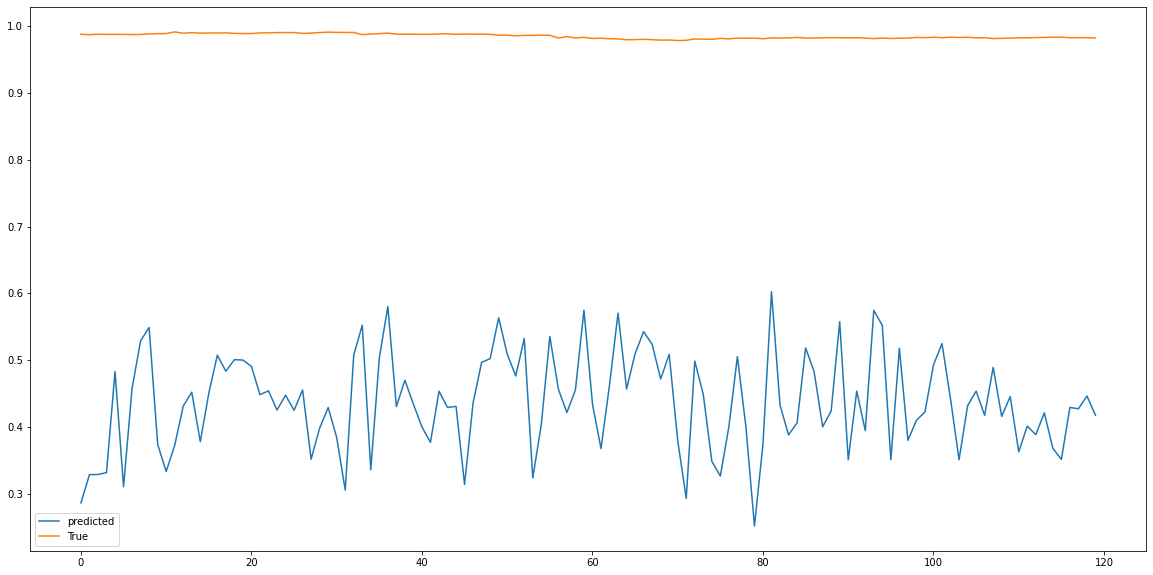

In [210]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_hat[0], label='predicted')
plt.plot(y[0][0], label='True')
plt.legend()

In [188]:
X_input = X[0]
X_input = X_input.reshape((1, X_input.shape[0], X_input.shape[1]))
y_hat = model.predict(X_input)
np.sum(np.square(y_hat - y[0]))

36.6988113253841

In [187]:
model.fit(X, y, batch_size=32, epochs=10)

Epoch 1/10
34/34 [==============================] - 18s 440ms/step - loss: 4298.9477
Epoch 2/10
34/34 [==============================] - 15s 436ms/step - loss: 22818463.8174
Epoch 3/10
34/34 [==============================] - 15s 432ms/step - loss: 0.8301
Epoch 4/10
34/34 [==============================] - 15s 443ms/step - loss: 0.8110
Epoch 5/10
34/34 [==============================] - 15s 440ms/step - loss: 0.7745
Epoch 6/10
34/34 [==============================] - 17s 507ms/step - loss: 0.7370
Epoch 7/10
34/34 [==============================] - 17s 503ms/step - loss: 0.7000
Epoch 8/10
34/34 [==============================] - 17s 484ms/step - loss: 0.6626
Epoch 9/10
34/34 [==============================] - 15s 454ms/step - loss: 0.6253
Epoch 10/10
34/34 [==============================] - 16s 459ms/step - loss: 0.5880
